# SCRAPPED DATA ANALYSIS

# TOOLBOX

In [18]:
import pandas as pd # data loading 
import re # regex
import seaborn as sns

# Exploratory Data Analysis

In [19]:
# import data
df_houses = pd.read_csv("houses.csv")

In [20]:
df_houses.head()

,title,Location,details,Price,Description
0,"\n4 bedroom townhouse for sale in Ruiru\n,\nBr...","\nKenyatta Road, Ruiru, Ruiru\n",\n4\n,"\nKSh 11,550,000\n",\nBreathtaking modern Maisonettes and Bungalow...
1,"\n3 bedroom house for sale in Ongata Rongai\n,...","\nOngata Rongai, Kajiado North\n","\n2500 m²\n,\n3\n","\nKSh 6,000,000\n",\nVery Beautiful 3 BR houses in Ongata Rongai\...
2,"\n5 bedroom townhouse for sale in Lavington\n,...","\nLavington, Dagoretti North\n",\n5\n,"\nKSh 53,000,000\n",\nMasterful Design! Lavington Five Bedroom Tow...
3,"\n4 bedroom house for sale in Runda\n,\nBeauti...","\nRunda, Westlands\n",\n4\n,"\nKSh 92,000,000\n",\nBeautiful and specious four bedroom Stand-al...
4,"\n4 bedroom house for sale in Syokimau\n,\nMag...","\n N/A, N/A, Syokimau, Athi River\n","\n3600 ft²\n,\n4\n","\nKSh 39,500,000\n",\nMagnificently modern custom 5br house on sal...


In [21]:
df = df_houses.copy()

In [22]:
# View what you have 
for i in df['title'][:3].values:
    print(i.split())

['4', 'bedroom', 'townhouse', 'for', 'sale', 'in', 'Ruiru', ',', 'Breathtaking', 'modern', 'Maisonettes', 'and', 'Bungalows', 'f', '...']
['3', 'bedroom', 'house', 'for', 'sale', 'in', 'Ongata', 'Rongai', ',', 'Very', 'Beautiful', '3', 'BR', 'houses', 'in', 'Ongata', 'Rongai']
['5', 'bedroom', 'townhouse', 'for', 'sale', 'in', 'Lavington', ',', 'Masterful', 'Design!', 'Lavington', 'Five', 'Bedroom', 'Townho', '...']


In [23]:
for i in df['Location'][:3].values:
    print(i.split())

['Kenyatta', 'Road,', 'Ruiru,', 'Ruiru']
['Ongata', 'Rongai,', 'Kajiado', 'North']
['Lavington,', 'Dagoretti', 'North']


In [24]:
for i in df['Price'][:3].values:
    print(i.split())


['KSh', '11,550,000']
['KSh', '6,000,000']
['KSh', '53,000,000']


In [25]:
# View what you have 
for i in df['details'][:10].values:
    print(i.split())

['4']
['2500', 'm²', ',', '3']
['5']
['4']
['3600', 'ft²', ',', '4']
['3']
['5']
['4']
['2000', 'm²', ',', '2']
['5']


In [26]:
for i in df['Description'][:3].values:
    print(i.split())

['Breathtaking', 'modern', 'Maisonettes', 'and', 'Bungalows', 'f...', ',', '4', 'bedroom', 'townhouse', 'for', 'sale', 'in', 'Ruiru']
['Very', 'Beautiful', '3', 'BR', 'houses', 'in', 'Ongata', 'Rongai', ',', '3', 'bedroom', 'house', 'for', 'sale', 'in', 'Ongata', 'Rongai']
['Masterful', 'Design!', 'Lavington', 'Five', 'Bedroom', 'Townho...', ',', '5', 'bedroom', 'townhouse', 'for', 'sale', 'in', 'Lavington']


# Data Cleaning

In [27]:
# Data cleaning

# --------- replace 
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

In [28]:
# Remove Ksh, and commas in text

df['Price'] = df['Price'].str.replace('KSh','')
df['Price'] = df['Price'].str.replace(',','')

In [29]:
# Filter only houses in m and ft
df1 = df[~df['details'].str.contains('m')]
df2= df1[~df1['details'].str.contains('ft')]

In [30]:
# Create a new column of bedrooms from details.
df2['Bedrooms'] = df2['details']

C:\Users\munya\AppData\Local\Temp\ipykernel_6848\843814918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bedrooms'] = df2['details']


In [31]:
df2

,title,Location,details,Price,Description,Bedrooms
0,"4 bedroom townhouse for sale in Ruiru,Breathta...","Kenyatta Road, Ruiru, Ruiru",4,11550000,Breathtaking modern Maisonettes and Bungalows ...,4
2,"5 bedroom townhouse for sale in Lavington,Mast...","Lavington, Dagoretti North",5,53000000,Masterful Design! Lavington Five Bedroom Townh...,5
3,"4 bedroom house for sale in Runda,Beautiful an...","Runda, Westlands",4,92000000,Beautiful and specious four bedroom Stand-alon...,4
5,"3 bedroom townhouse for sale in Gikambura,Thre...","Gikambura, Kikuyu",3,9000000,"Three Bedroom All En Suite,3 bedroom townhouse...",3
6,"5 bedroom villa for sale in Runda,VILLAS for S...","Runda, Westlands",5,115000000,"VILLAS for SALE in RUNDA,5 bedroom villa for s...",5
...,...,...,...,...,...,...
1975,"5 bedroom house for sale in Old Muthaiga,5bedr...","Naivasha Avenue, Old Muthaiga, Muthaiga",5,270000000,"5bedroom Home For Sale,5 bedroom house for sal...",5
1976,"5 bedroom townhouse for sale in Kileleshwa,5be...","Kileleshwa, Dagoretti North",5,60000000,"5bedroom 60milion,5 bedroom townhouse for sale...",5
1977,"5 bedroom house for sale in Karen,Amara Ridge.","7, Karen, Karen, Langata",5,150000000,"Amara Ridge., 5 bedroom house for sale in Karen",5
1979,"4 bedroom townhouse for sale in Lavington,4bed...","Lavington, Dagoretti North",4,25000000,"4bedroom 25M,4 bedroom townhouse for sale in L...",4


In [32]:
df2

,title,Location,details,Price,Description,Bedrooms
0,"4 bedroom townhouse for sale in Ruiru,Breathta...","Kenyatta Road, Ruiru, Ruiru",4,11550000,Breathtaking modern Maisonettes and Bungalows ...,4
2,"5 bedroom townhouse for sale in Lavington,Mast...","Lavington, Dagoretti North",5,53000000,Masterful Design! Lavington Five Bedroom Townh...,5
3,"4 bedroom house for sale in Runda,Beautiful an...","Runda, Westlands",4,92000000,Beautiful and specious four bedroom Stand-alon...,4
5,"3 bedroom townhouse for sale in Gikambura,Thre...","Gikambura, Kikuyu",3,9000000,"Three Bedroom All En Suite,3 bedroom townhouse...",3
6,"5 bedroom villa for sale in Runda,VILLAS for S...","Runda, Westlands",5,115000000,"VILLAS for SALE in RUNDA,5 bedroom villa for s...",5
...,...,...,...,...,...,...
1975,"5 bedroom house for sale in Old Muthaiga,5bedr...","Naivasha Avenue, Old Muthaiga, Muthaiga",5,270000000,"5bedroom Home For Sale,5 bedroom house for sal...",5
1976,"5 bedroom townhouse for sale in Kileleshwa,5be...","Kileleshwa, Dagoretti North",5,60000000,"5bedroom 60milion,5 bedroom townhouse for sale...",5
1977,"5 bedroom house for sale in Karen,Amara Ridge.","7, Karen, Karen, Langata",5,150000000,"Amara Ridge., 5 bedroom house for sale in Karen",5
1979,"4 bedroom townhouse for sale in Lavington,4bed...","Lavington, Dagoretti North",4,25000000,"4bedroom 25M,4 bedroom townhouse for sale in L...",4


In [37]:
# !pip install geopy

In [35]:
# Get lat and long 
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Kenyatta Road, Ruiru, Ruiru	')

In [36]:
location.latitude, location.longitude

(-1.1444599000000002, 36.9671042720111)

In [97]:
df2['Bedrooms'].unique()

array(['4', '5', '3', '6', '7', '2', '3,2', ' 4', '1,1', '4,3', '8', '1',
       '4 ', '2,3', '1,3', '1,5', '2114,5', '10', '5 ', '3 ', '2,6',
       '5,5', '5, 5', '2,5', '6,4', ' 3', ' 5', '1,6', '4500,4', '4,5',
       '1,2', '4600,5', '1,9', '2,4', '9', ' 3,3', '4,4', '1,4',
       '10000 ha,6', '1000,4'], dtype=object)

In [88]:
df2['Price'] = df['Price'].str.replace('P.O.A','0')

<ipython-input-88-3f2b133829c0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Price'] = df['Price'].str.replace('P.O.A','0')
<ipython-input-88-3f2b133829c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Price'] = df['Price'].str.replace('P.O.A','0')


In [98]:
#df2['Bedrooms']= pd.to_numeric(df2['Bedrooms'])

In [96]:
df2['Bedrooms'] = df2['Bedrooms'].str.replace(' ac','')

<ipython-input-96-638e46ce6a37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bedrooms'] = df2['Bedrooms'].str.replace(' ac','')


C:\Users\ronal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

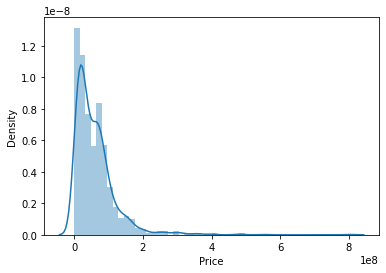

In [113]:
# Distribution pf prices 
sns.distplot(df2['Price'])